In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os

from reservoirpy.datasets import mackey_glass, lorenz96, henon_map
from utils.dataGenerator import powerlawNoiseGenerator
from utils.dataPlots import plot_timeseries, plot_attractor

from core.models import EchoStateNetwork, SingleNodeDelayESN, TwoNodeDelayESN
from core.pipelines import StandardPipeline, DelayPipeline

from utils.plotting import predictionAnalysis, predictionAnalysisNDim, internalStatesHistogram
from utils.exporting import export_results

In [2]:
timeseries = mackey_glass(15000)
timeseries.shape

(15000, 1)

/Users/sashvqz/Downloads/TFGs/utils/dataPlots.py:20: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


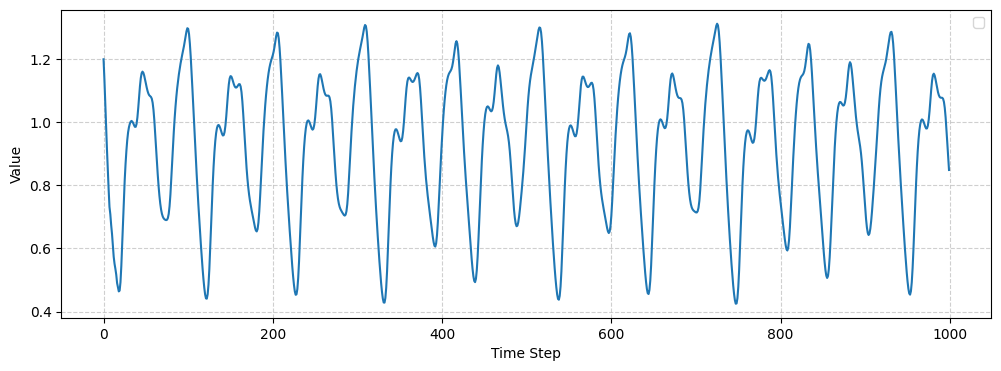

In [3]:
plot_timeseries(timeseries)

In [4]:
params = {
    'inputSize': 1,
    'reservoirSize': 347,
    'outputSize': 1,
    'spectralRadius': 0.93,
    'inputScaling': 0.39,
    'leakingRate': 0.34,
    'sparsity': 0.77,
    'ridgeParam': 0.25,
    'activation': np.tanh,
    'feedback': False,
    'stateNoise': 0.0,
    'randomSeed': 42
}

In [5]:
model = EchoStateNetwork(**params)

In [6]:
pipeline = StandardPipeline(esn_model=model)

In [7]:
predictions, actuals, metrics, internal_states = pipeline.run(
    timeseries,
    trainRatio=0.7,
    predictionHorizon=1,
    washout_train=500,
    washout_pred=0,
)

In [8]:
metrics

{'mse': 3.8439195375756354e-05,
 'rmse': np.float64(0.006199935110608526),
 'mae': 0.00267663657378045,
 'nrmse': np.float64(0.006889922385924618)}

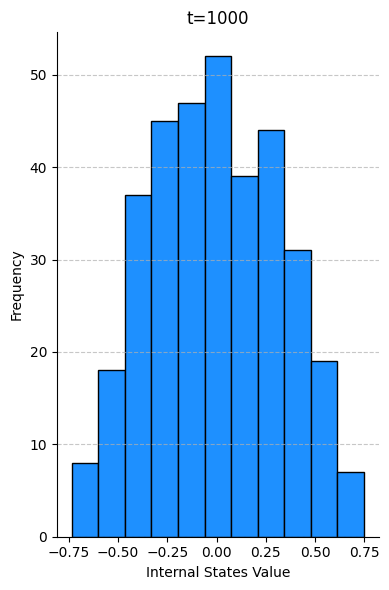

In [9]:
internalStatesHistogram(
    states=internal_states,
    time_step_index=1000,
    reservoir_size=params['reservoirSize'],
)

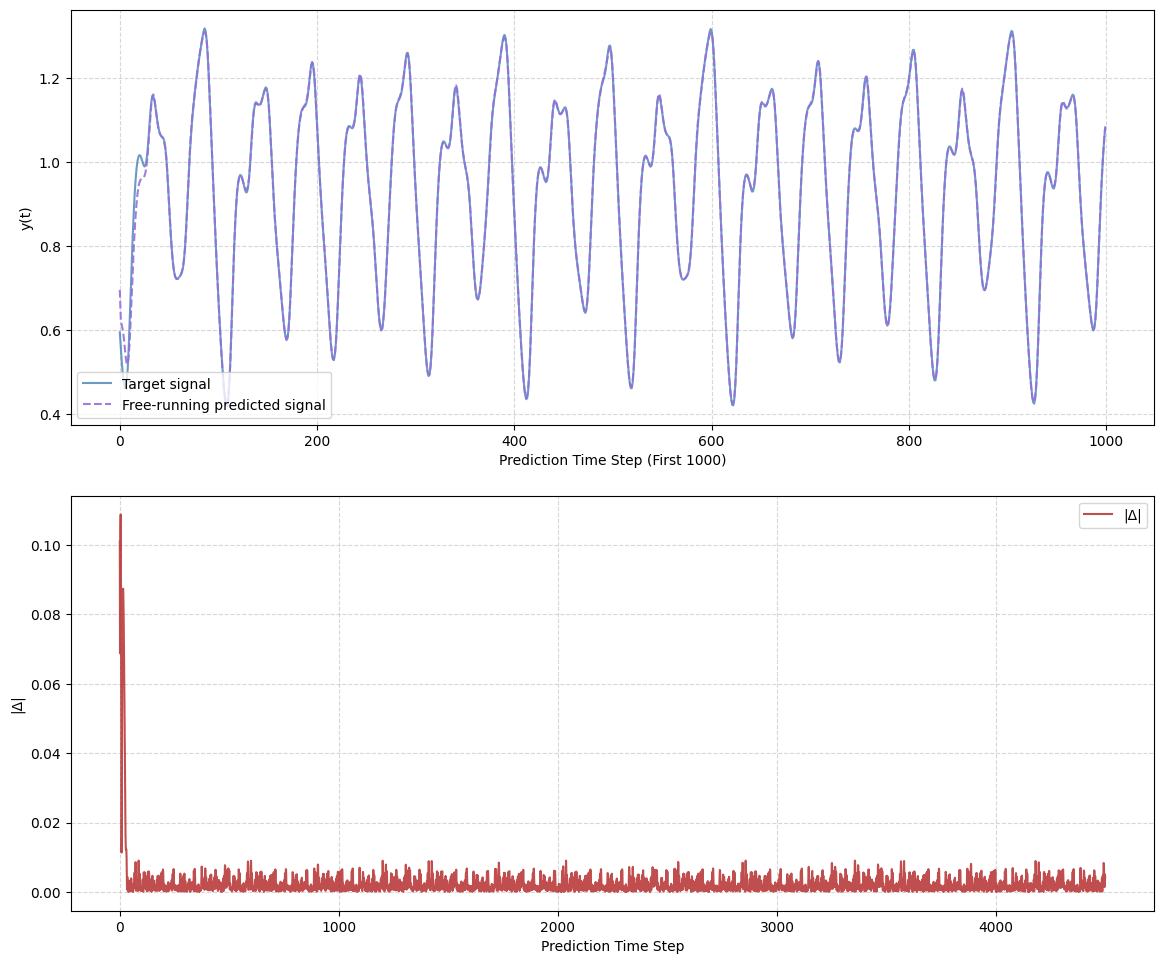

In [10]:
predictionAnalysis(predictions, actuals, zoom_limit=1000)

In [11]:
henonSeries = henon_map(n_timesteps=15000)
henonSeries.shape

(15000, 2)

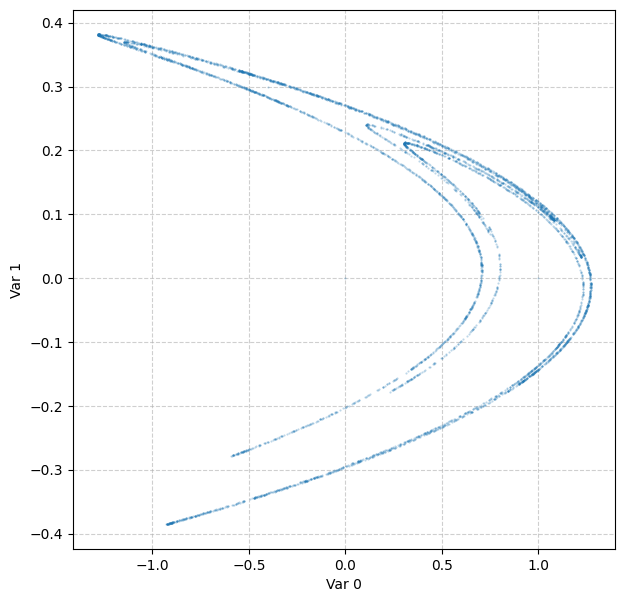

In [12]:
plot_attractor(henonSeries)

In [13]:
paramsHenon = {
    'inputSize': 2,
    'reservoirSize': 800,
    'outputSize': 2,
    'spectralRadius': 0.9,
    'ridgeParam': 1e-8,
    'leakingRate': 0.2,
    'randomSeed': 42
}

In [14]:
modelHenon = EchoStateNetwork(**paramsHenon)

In [15]:
pipelineHenon = StandardPipeline(esn_model=modelHenon)

In [16]:
predictionsHenon, actualsHenon, metricsHenon, internal_statesHenon = pipelineHenon.run(
    henonSeries,
    trainRatio=0.7,
    predictionHorizon=1,
    washout_train=500,
    washout_pred=0,
)

In [17]:
metricsHenon

{'mse': 0.0009588642224803174,
 'rmse': np.float64(0.03096553281441024),
 'mae': 0.0018711373086068982,
 'nrmse': np.float64(0.018629969180762002)}

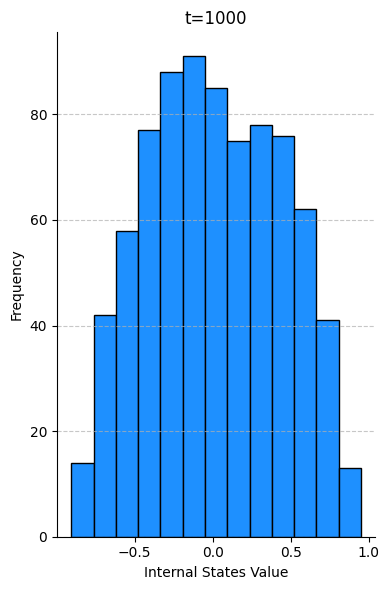

In [18]:
internalStatesHistogram(
    states=internal_statesHenon,
    time_step_index=1000,
    reservoir_size=paramsHenon['reservoirSize'],
)

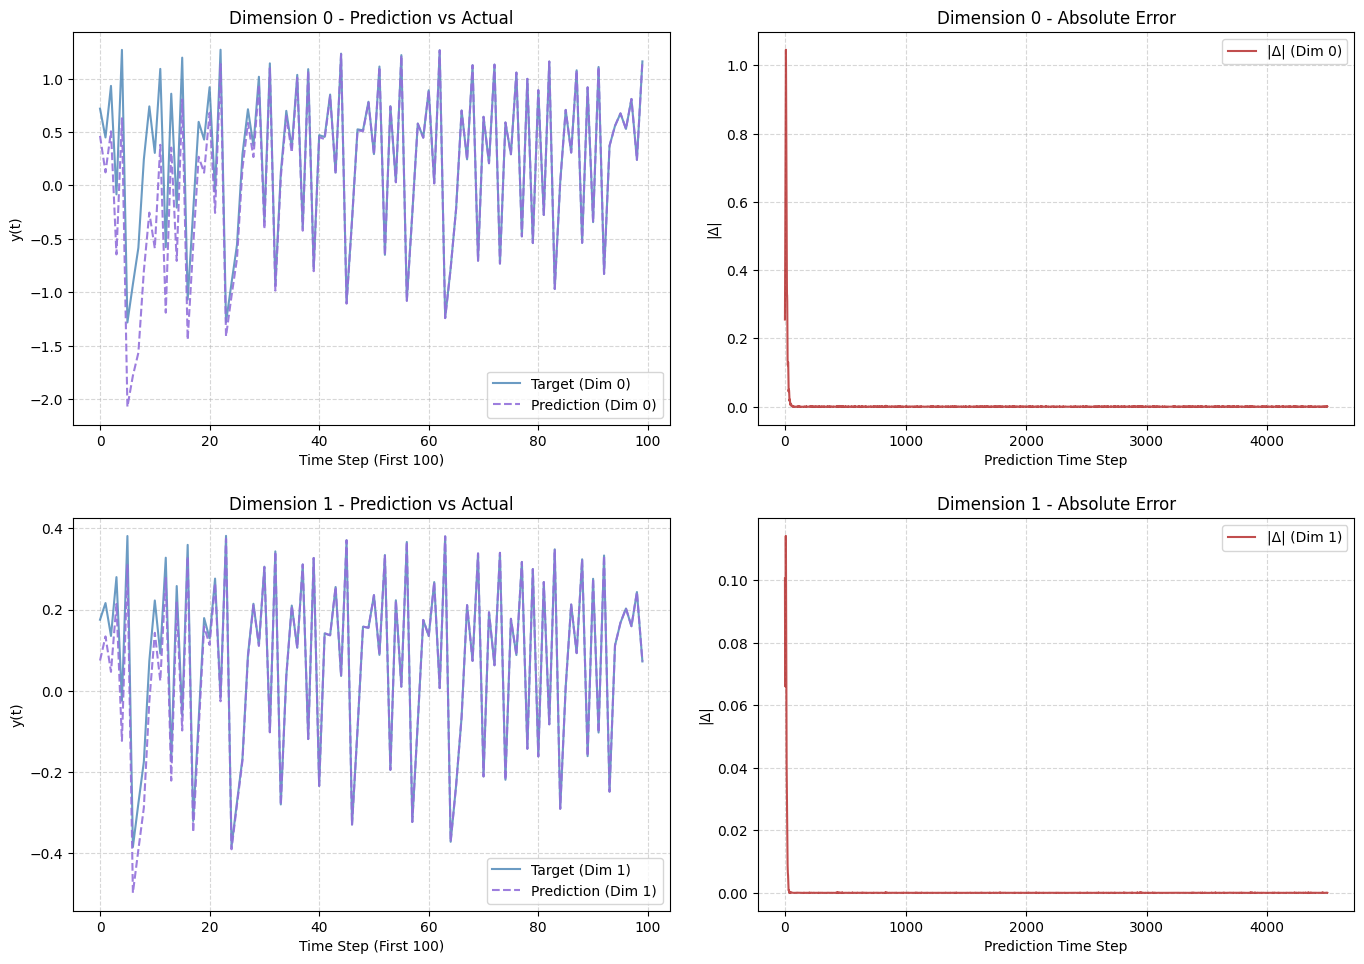

In [19]:
predictionAnalysisNDim(predictionsHenon, actualsHenon, zoom_limit=100)

In [20]:
N_STEPS = 15000
BETA = 1.
SEED = 42

In [21]:
timeseriesPowerLaw = powerlawNoiseGenerator(N_STEPS, BETA, randomSeed=SEED)
timeseriesPowerLawSim = timeseriesPowerLaw.reshape(-1, 1)
timeseriesPowerLaw.shape

(15000,)

/Users/sashvqz/Downloads/TFGs/utils/dataPlots.py:20: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


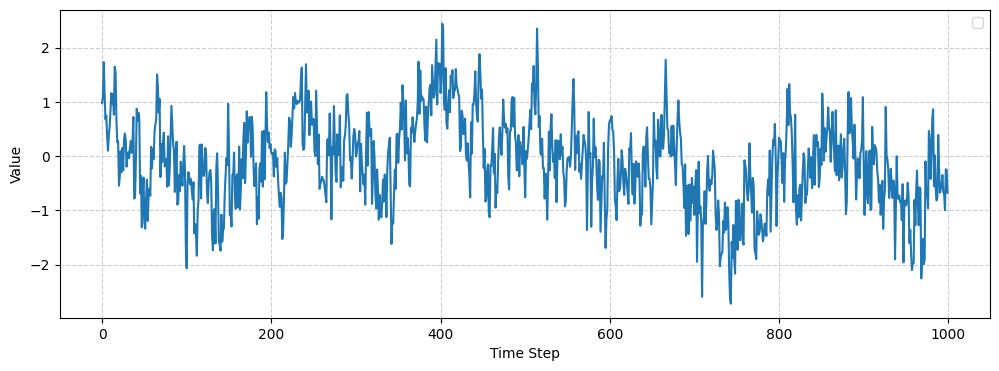

In [22]:
plot_timeseries(timeseriesPowerLaw)

In [34]:
paramsPowerLaw = {
    'inputSize': 1,
    'reservoirSize': 347,
    'outputSize': 1,
    'spectralRadius': 0.93,
    'inputScaling': 0.39,
    'leakingRate': 0.34,
    'sparsity': 0.77,
    'ridgeParam': 0.75,
    'activation': np.tanh,
    'feedback': False,
    'stateNoise': 0.0,
    'randomSeed': 42
}

In [35]:
modelPowerLaw = EchoStateNetwork(**paramsPowerLaw)

In [36]:
pipelinePowerLaw = StandardPipeline(esn_model=modelPowerLaw)

In [37]:
predictionsPowerLaw, actualsPowerLaw, metricsPowerLaw, internal_statesPowerLaw = pipelinePowerLaw.run(
    timeseriesPowerLawSim,
    trainRatio=0.7,
    predictionHorizon=1,
    washout_train=500,
    washout_pred=0,
)

In [38]:
metricsPowerLaw

{'mse': 0.2817521682477656,
 'rmse': np.float64(0.5308033235085907),
 'mae': 0.4221751166275794,
 'nrmse': np.float64(0.08065859965903392)}

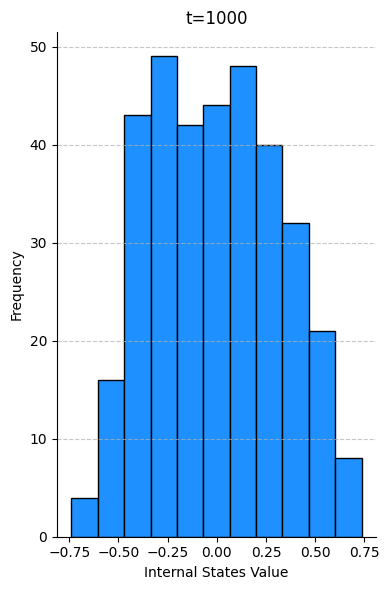

In [39]:
internalStatesHistogram(
    states=internal_statesPowerLaw,
    time_step_index=1000,
    reservoir_size=paramsPowerLaw['reservoirSize'],
)

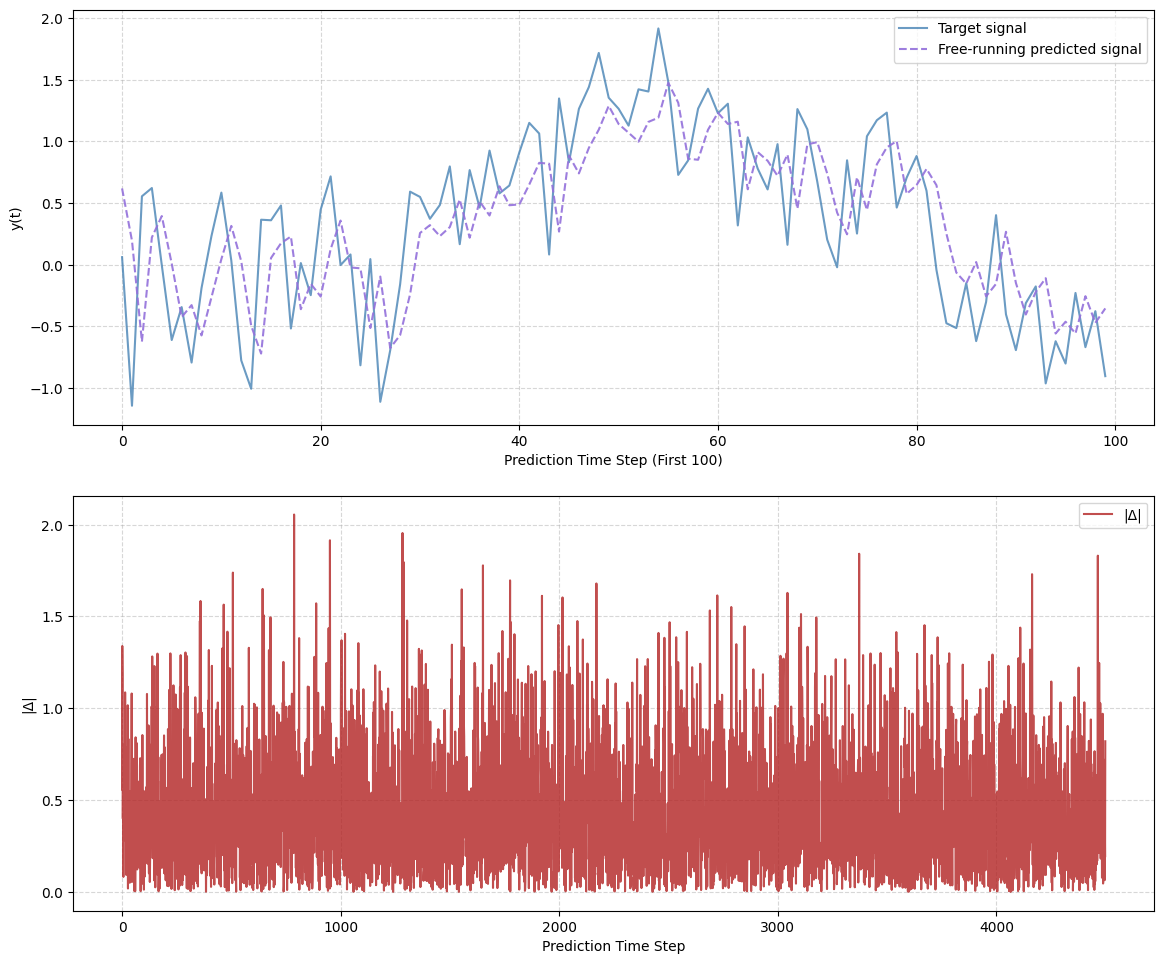

In [40]:
predictionAnalysis(predictionsPowerLaw, actualsPowerLaw, zoom_limit=100)